# Разведочный анализ данных: продолжение

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

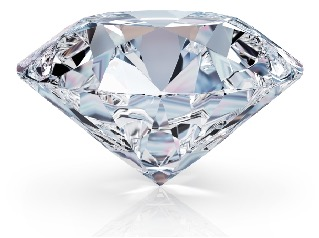

## Импорт библиотек и загрузка данных

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
DIAMONDS_DATASET = "diamonds_good.csv"

In [20]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## Предобработка данных

Размер датасета

In [33]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53442 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    52950 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53935 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [35]:
df_corr = df.copy()

In [36]:
df_corr.drop_duplicates(inplace=True)

In [37]:
df_corr.reset_index(inplace=True, drop=True)

In [38]:
cut_order = {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}
clarity_map = {'I1': 7, 'SI2': 6, 'SI1': 5, 'VS2': 4, 'VS1': 3, 'VVS1': 2, 'VVS2': 1, 'IF': 0}

df_corr['cut'] = df_corr['cut'].map(cut_order)
df_corr['clarity'] = df_corr['clarity'].map(clarity_map)

In [39]:
from sklearn.preprocessing import OneHotEncoder

color_col = df_corr[['color']]

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(color_col)

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(['color']),
    index=df_corr.index
)

df_corr = pd.concat([df_corr, encoded_df], axis=1)

In [40]:
df_corr = df_corr.drop(['color'], axis=1)

In [41]:
df_corr

,carat,cut,clarity,depth,table,price,'x','y','z',color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4.0,6,61.5,55.0,326.0,3.95,3.98,2.43,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,3.0,5,59.8,61.0,326.0,3.89,3.84,2.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,1.0,3,56.9,65.0,327.0,4.05,4.07,2.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,3.0,4,62.4,58.0,334.0,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,1.0,6,63.3,58.0,335.0,4.34,4.35,2.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53800,0.72,4.0,5,60.8,57.0,2757.0,5.75,5.76,3.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53801,0.72,1.0,5,63.1,55.0,2757.0,5.69,5.75,3.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53802,0.70,2.0,5,62.8,60.0,2757.0,5.66,5.68,3.56,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53803,0.86,3.0,6,61.0,58.0,2757.0,6.15,6.12,3.74,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Взаимозависимость в данных

### 1. Корреляция

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

In [42]:
corr = df_corr.corr() # матрица корреляций

<Axes: >

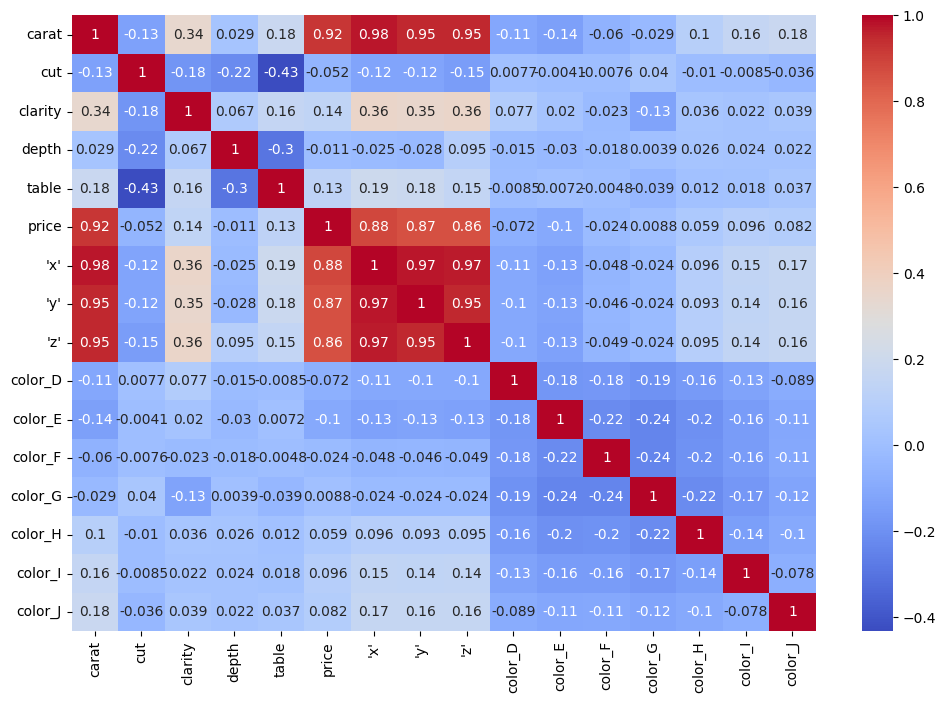

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

In [45]:
corr = df_corr.corr(method='spearman')

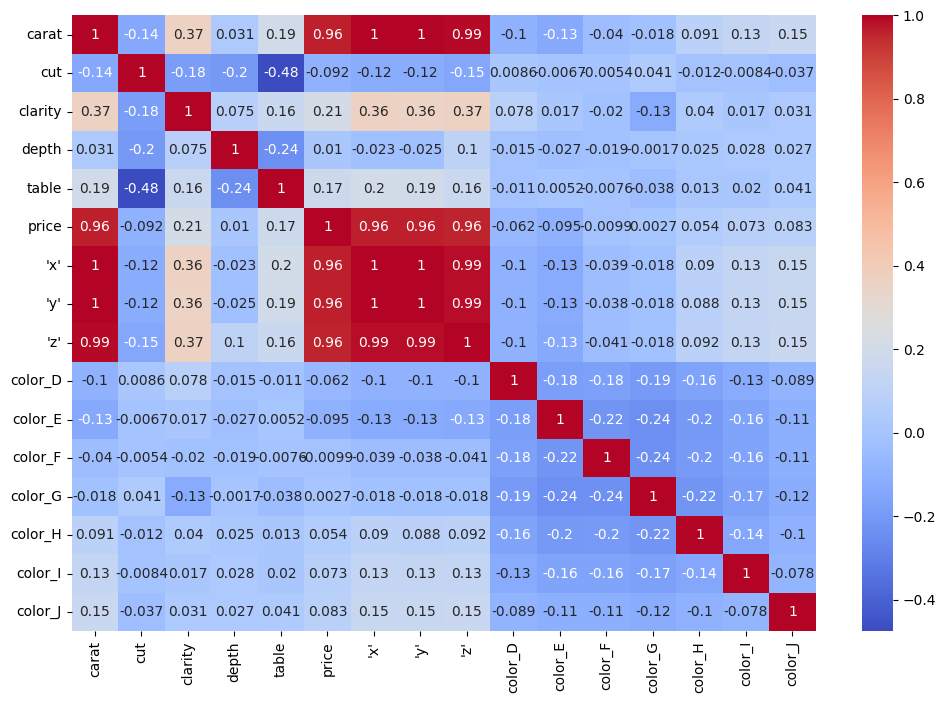

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True);

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

### Задание 1

Вычислите матрицу корреляций, используя корреляцию Кендалла.

С каким столбцом коррелирует в этой матрице `depth` больше всего?

In [47]:
corr = df_corr.corr(method='kendall')

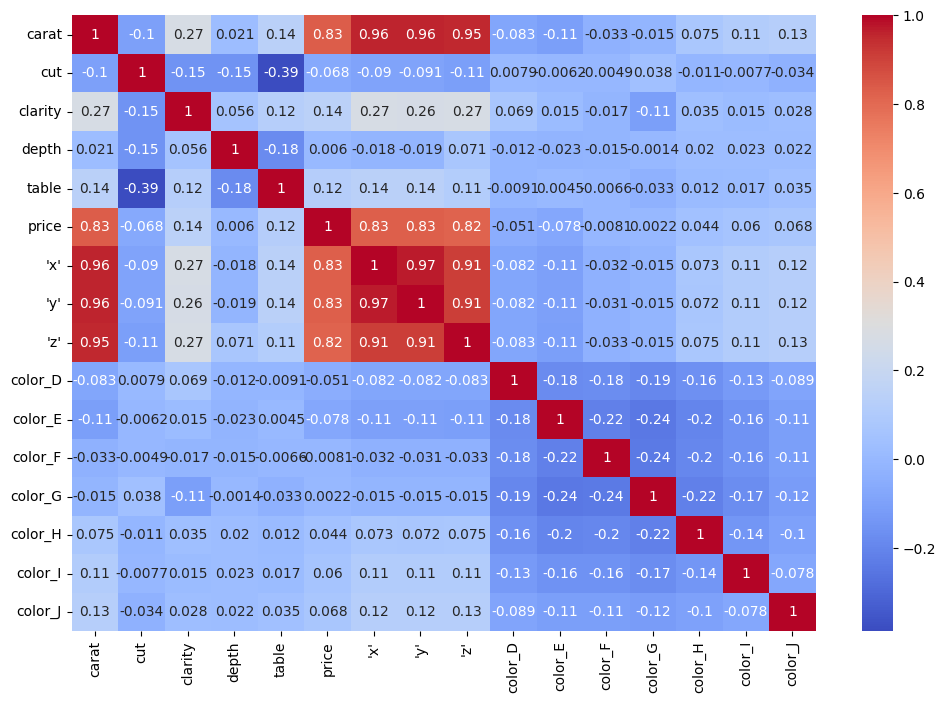

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True);

depth лучше всего коррелирует с z 

### 2. V-мера Крамера

*Для измерения связи между Категориальным - Категориальным признаком*

Для оценки степени взаимосвязи категориальных столбцов можно вычислять V-меру Крамера.
Это вариант нормировки статистики $\chi^2$. Статистика $\chi^2$ - это функция, измеряющая меру взаимосвязи двух категориальных переменных.

Пусть $X, Y$ - две категориальных переменных, тогда $\chi^2$ вычисляется по формуле

$$\chi^2(X,Y)=\sum_{i,j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}},$$

где $O_{ij}$ - наблюдаемая частота события, $E_{ij}$ - ожидаемая частота события (в предположении, что величины $X$ и $Y$ независимы).

Чем больше значение $\chi^2$ - тем больше степень взаимосвязи переменных $X$ и $Y$.



**Покажем на примере.**

Изучим по некоторым данным зависимость факта курения и повышенного давления. По данным составим таблицу сопряженности.

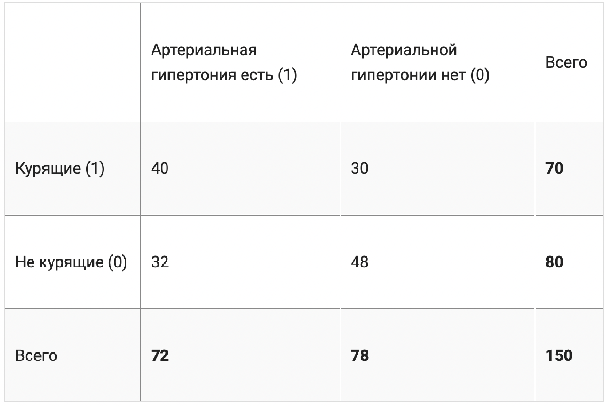

Вычисляем $\chi^2$:

$O_{11} = 40$

$E_{11} = 70 * 72 / 150 \approx 33.6 $ (так считается $E_{ij}$, если величины независимы)

Аналогично вычисляются оставшиеся слагаемые в формуле. Получаем

$\chi^2(X,Y) = (40-33.6)^2/33.6 + (30-36.4)^2/36.4 + (32-38.4)^2/38.4 + (48-41.6)^2/41.6 = 4.396$



Чем больше $\chi^2$, тем больше взаимосвязь между признаками.

В случае, если признаки независимы, то ожидаемая и наблюдаемая частоты совпадут, и $\chi^2=0$.



V-мера Крамера - это нормировка $\chi^2$ на число значений в каждой категории:

$$V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}},$$

где


$n$ - общее число наблюдений

$k$ - число категорий в $X$

$r$ - число категорий в $Y$


В результате этой нормировки V-мера находится на отрезке от 0 до 1 и легко интерпретируется: *чем больше V-мера - тем больше зависимость между двумя переменными, и наоборот.*

In [50]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

/home/alexus/Desktop/DeepCA/venv/lib/python3.12/site-packages/association_metrics/categorical.py:100: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.matrix[x][y] = 1
/home/alexus/Desktop/DeepCA/venv/lib/python3.12/site-packages/associati

,cut,color,clarity
cut,1.000000,0.034063,0.127546
color,0.034063,1.000000,0.079531
clarity,0.127546,0.079531,1.000000


### 3. ANOVA

*Для измерения связи между Числовым - Категориальным признаком*

ANOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [51]:
# Generating sample data
import pandas as pd
ColumnNames=['FuelType','CarPrice']
DataValues= [
             [  'Petrol',   2000],
             [  'Petrol',   2100],
             [  'Petrol',   1900],
             [  'Petrol',   2150],
             [  'Petrol',   2100],
             [  'Petrol',   2200],
             [  'Petrol',   1950],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'Diesel',   2900],
             [  'Diesel',   2850],
             [  'Diesel',   2600],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'CNG',   1500],
             [  'CNG',   1400],
             [  'CNG',   1600],
             [  'CNG',   1650],
             [  'CNG',   1600],
             [  'CNG',   1500],
             [  'CNG',   1500]
           ]
#Create the Data Frame
CarData=pd.DataFrame(data=DataValues,columns=ColumnNames)

########################################################
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value

from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list

CategoryGroupLists = CarData.groupby('FuelType')['CarPrice'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  4.3558466424602e-12
Features are correlated


In [52]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,cut,carat,Yes
1,cut,depth,Yes
2,cut,table,Yes
3,cut,price,Yes
4,cut,'x',Yes
5,cut,'y',Yes
6,cut,'z',Yes
7,color,carat,Yes
8,color,depth,Yes
9,color,table,Yes


## Polars

В конце 2020 года в python стала доступна библиотека Polars.

Polars - это высокопроизводительная библиотека для манипуляции и анализа данных в Python и Rust. Она была создана как альтернатива Pandas, но с учетом возможностей параллельной обработки данных на многопроцессорных системах.

Одним из основных преимуществ Polars является его скорость работы с данными. Polars использует многопоточную обработку данных, что позволяет обрабатывать большие объемы данных на многопроцессорных системах в несколько раз быстрее, чем Pandas. Кроме того, Polars имеет более эффективную систему памяти, что позволяет работать с данными, которые не помещаются в оперативной памяти.


Хорошая [статья про сравнение Pandas и Polars](https://vc.ru/u/1389654-machine-learning/583603-pandas-vs-polars-sravnenie-sintaksisa-i-skorosti)

In [53]:
df_big = df.copy()

for i in range(50):
  df_big = pd.concat([df_big, df])

df_big.to_csv("diamonds_big.csv", index=False)

In [54]:
df_big.shape, df.shape

((2750940, 10), (53940, 10))

In [55]:
import polars as pl

print(pl.__version__)

1.33.1


### Загрузка данных

In [56]:
%%time

df_pl = pl.read_csv("diamonds_big.csv")

CPU times: user 657 ms, sys: 112 ms, total: 769 ms
Wall time: 41.2 ms


In [57]:
%%time

df = pd.read_csv("diamonds_big.csv")

CPU times: user 599 ms, sys: 107 ms, total: 706 ms
Wall time: 705 ms


### Выбор и фильтрация данных

In [58]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [59]:
%%time

df[['carat', 'depth']]

CPU times: user 8.67 ms, sys: 3.98 ms, total: 12.7 ms
Wall time: 11.5 ms


,carat,depth
0,0.23,61.5
1,0.21,59.8
2,0.23,56.9
3,0.29,62.4
4,0.31,63.3
...,...,...
2750935,0.72,60.8
2750936,0.72,63.1
2750937,0.70,62.8
2750938,0.86,61.0


In [60]:
%%time

df_pl[['carat', 'depth']]

# df_pl.select(pl.col(['carat', 'depth']))

CPU times: user 256 μs, sys: 4 μs, total: 260 μs
Wall time: 275 μs


carat,depth
f64,f64
0.23,61.5
0.21,59.8
0.23,56.9
0.29,62.4
0.31,63.3
…,…
0.72,60.8
0.72,63.1
0.7,62.8


In [61]:
# Pandas
%%time

df.query('carat > 5')

UsageError: Line magic function `%%time` not found.


In [50]:
# Polars
%%time

df_pl.filter(pl.col('carat') > 5)

CPU times: user 12.8 ms, sys: 3.97 ms, total: 16.8 ms
Wall time: 130 ms


carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
…,…,…,…,…,…,…,…,…,…
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98


### Задание 2

С помощью polars и pandas отфильтруйте таблицу, оставив в ней только строки, удовлетворяющие условиям:
* `color` = "J"
* `price` > 1000

Сравните время выполнения запросов

In [62]:
%%time

df[(df.color == 'J') & (df.price > 1000)]

CPU times: user 92 ms, sys: 958 μs, total: 93 ms
Wall time: 91.8 ms


,carat,cut,color,clarity,depth,table,price,'x','y','z'
172,1.17,Very Good,J,I1,60.2,61.0,2774.0,6.83,6.90,4.13
247,1.05,Very Good,J,SI2,63.2,56.0,2789.0,6.49,6.45,4.09
255,1.05,Fair,J,SI2,65.8,59.0,2789.0,6.41,6.27,4.18
324,1.00,Premium,J,SI2,62.3,58.0,2801.0,6.45,6.34,3.98
366,0.93,Premium,J,SI2,61.9,57.0,2807.0,6.21,6.19,3.84
...,...,...,...,...,...,...,...,...,...,...
2750702,0.90,Good,J,SI2,63.9,56.0,2717.0,6.17,6.10,3.92
2750787,0.90,Good,J,SI1,63.2,60.0,2729.0,6.09,6.12,3.86
2750848,0.82,Ideal,J,VS2,61.6,56.0,2741.0,6.00,6.04,3.71
2750852,0.83,Ideal,J,VS2,62.3,55.0,2742.0,6.01,6.03,3.75


In [63]:
%%time

df_pl.filter((pl.col('color') == 'J') & (pl.col('price') > 1000))

CPU times: user 64.8 ms, sys: 10.4 ms, total: 75.3 ms
Wall time: 7.35 ms


carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
1.17,"""Very Good""","""J""","""I1""",60.2,61.0,2774.0,6.83,6.9,4.13
1.05,"""Very Good""","""J""","""SI2""",63.2,56.0,2789.0,6.49,6.45,4.09
1.05,"""Fair""","""J""","""SI2""",65.8,59.0,2789.0,6.41,6.27,4.18
1.0,"""Premium""","""J""","""SI2""",62.3,58.0,2801.0,6.45,6.34,3.98
0.93,"""Premium""","""J""","""SI2""",61.9,57.0,2807.0,6.21,6.19,3.84
…,…,…,…,…,…,…,…,…,…
0.9,"""Good""","""J""","""SI2""",63.9,56.0,2717.0,6.17,6.1,3.92
0.9,"""Good""","""J""","""SI1""",63.2,60.0,2729.0,6.09,6.12,3.86
0.82,"""Ideal""","""J""","""VS2""",61.6,56.0,2741.0,6.0,6.04,3.71


* pandas CPU times:user 92 ms, sys: 958 μs, total: 93 ms; Wall time: 91.8 ms
* polars CPU times:user 64.8 ms, sys: 10.4 ms, total: 75.3 ms; Wall time: 7.35 ms

### Агрегация данных

In [64]:
df_pl.head()

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75


In [65]:
%%time

df.groupby('cut').agg({'table' : 'mean', 'price' : 'max'})

CPU times: user 75.2 ms, sys: 8.01 ms, total: 83.2 ms
Wall time: 82.6 ms


,table,price
cut,,
Fair,59.052612,18574.0
Good,58.693465,18788.0
Goood,57.687500,15083.0
Ideal,55.951747,18806.0
Premium,58.746869,18823.0
Very Good,57.955425,18818.0


In [68]:
%%time

df_pl.group_by('cut').agg([pl.mean('table'), pl.max('price')])

CPU times: user 156 ms, sys: 32.6 ms, total: 189 ms
Wall time: 14 ms


cut,table,price
str,f64,f64
"""Fair""",59.052612,18574.0
"""Goood""",57.6875,15083.0
"""Premium""",58.746869,18823.0
"""Ideal""",55.951747,18806.0
"""Very Good""",57.955425,18818.0
"""Good""",58.693465,18788.0


In [74]:


q = (df_pl.lazy().group_by(by='cut').agg(
        [
            pl.col('table').mean(),
            pl.col('price').max()
        ]
    )
)

In [75]:
%%time

q.collect()

CPU times: user 245 ms, sys: 20.3 ms, total: 265 ms
Wall time: 13.2 ms


by,table,price
str,f64,f64
"""Ideal""",55.951747,18806.0
"""Good""",58.693465,18788.0
"""Very Good""",57.955425,18818.0
"""Fair""",59.052612,18574.0
"""Goood""",57.6875,15083.0
"""Premium""",58.746869,18823.0


### Задание 3

Для каждого цвета (`color`) вычислите медианную стоимость алмазов и средний вес (`carat`).

* Сначала напишите eager-запрос в стиле, приближенном к pandas.

* Затем напишите lazy-запрос в polars-стиле. После этого выполните запрос методом collect.

* Сравните время выполнения запросов.



In [ ]:
%%time

df_pl.group_by('color').agg(
  pl.col('price').median().alias('median_price'),
  pl.col('carat').mean().alias('mean_carat')
).sort('color')


CPU times: user 341 ms, sys: 97.1 ms, total: 438 ms
Wall time: 44.4 ms


color,median_price,mean_carat
str,f64,f64
"""D""",1838.0,0.657859
"""E""",1739.0,0.657413
"""F""",2343.5,0.736582
"""G""",2242.0,0.770712
"""H""",3460.0,0.911617
"""I""",3730.0,1.025382
"""J""",4234.0,1.162099


In [77]:
%%time

df_pl.lazy().group_by('color').agg(
    pl.col('price').median().alias('median_price'),
    pl.col('carat').mean().alias('mean_carat')
).sort('color').collect()


CPU times: user 316 ms, sys: 11.2 ms, total: 327 ms
Wall time: 34.4 ms


color,median_price,mean_carat
str,f64,f64
"""D""",1838.0,0.657859
"""E""",1739.0,0.657413
"""F""",2343.5,0.736582
"""G""",2242.0,0.770712
"""H""",3460.0,0.911617
"""I""",3730.0,1.025382
"""J""",4234.0,1.162099


* pandas: CPU times: user 341 ms, sys: 97.1 ms, total: 438 ms
Wall time: 44.4 ms 
* polars lazy: CPU times: user 316 ms, sys: 11.2 ms, total: 327 ms
Wall time: 34.4 ms

Lazy-запрос работает быстрее

### Polars lazy-API

[Документация](https://pola-rs.github.io/polars-book/user-guide/lazy/using/)

With the lazy API, Polars doesn't run each query line-by-line but instead processes the full query end-to-end. To get the most out of Polars it is important that you use the lazy API because:

* the lazy API allows Polars to apply automatic query optimization with the query optimizer

* the lazy API allows you to work with larger than memory datasets using streaming

* the lazy API can catch schema errors before processing the data

In [78]:
q = (
    pl.scan_csv("diamonds_big.csv")
    .with_columns(pl.col("color").str.to_lowercase())
    .filter(pl.col("price") > 1000)
)

In [79]:
q

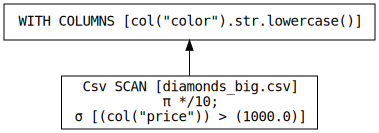

In [80]:
q.show_graph()

In [81]:
%%time

q.collect()

CPU times: user 821 ms, sys: 112 ms, total: 933 ms
Wall time: 65.5 ms


carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72
…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56


In [82]:
%%time

q.collect(streaming=True)

CPU times: user 654 ms, sys: 79.4 ms, total: 734 ms
Wall time: 53.2 ms


<timed eval>:1: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.


carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72
…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56


### Заключение по Polars и Pandas

Нельзя сказать, что Polars во всех запросах сильно выигрывает у Pandas, но благодаря его появлению разработчики выпустили Pandas 2.0 - версию классической библиотеки с привычным синтаксисом, но гораздо более быстрой работой.

Про сравнение Pandas, Polars и Pandas 2.0 можно почитать [здесь](https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1).

# Введение в машинное обучение (основные понятия)

Основные понятия.

В нашем примере мы можем попробовать предсказать стоимость алмаза по его характеристикам.

* алмазы - *объекты*
* характеристики - *признаки*
* стоимость - *целевая переменная*

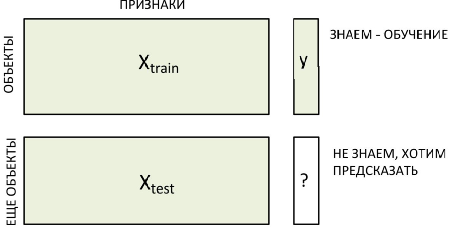

Модели машинного обучения - это некоторые математические правила (обычно функции), по которым модель делает прогноз.

**Пример (линейная регрессия):**

$price = a + b\cdot carat + c\cdot depth,$

здесь $a,b,c$ - параметры модели (заранее мы их не знаем).

*Параметры подбираются по обучающим данным так, чтобы модель ошибалась меньше всего.*

Пример плохо подобранных параметров $a, b$ модели
$$y = a + b\cdot x.$$

На рисунке
$$y = -30 + 7x.$$

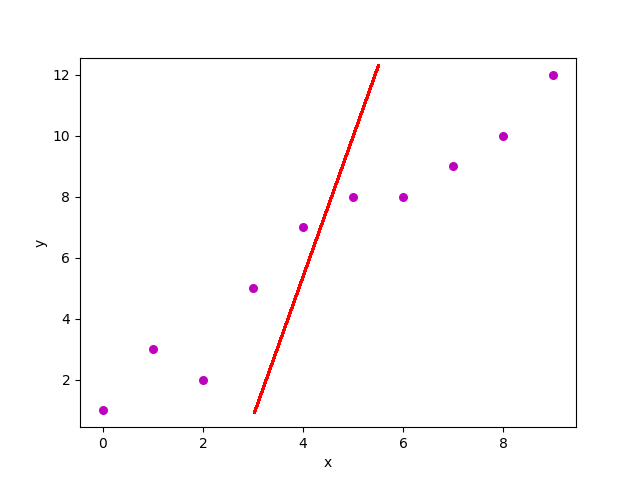

Пример хорошо подобранных параметров:
$$y = 0.5 + x.$$

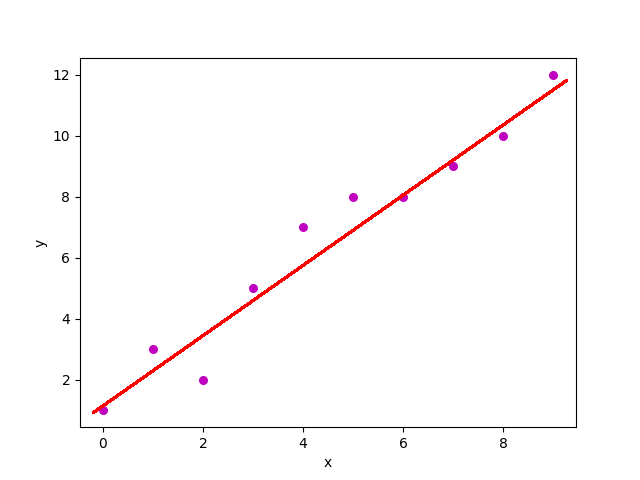

Функции для построения прогнозов бывают разные:

* линейные модели
* решающие правила (если $a$, то $b$)
* нейронные сети
* другие модели

Каждая модель хорошо работает в своих предположениях о данных, поэтому изучить распределение целевой переменной всегда очень полезно.

Обучим линейную регрессию предсказывать цену по числу карат.

In [130]:
median_carat = df['carat'].median()

df.fillna({'carat': median_carat}, inplace=True)

median_depth = df['depth'].median()

df['depth'].fillna(median_depth, inplace=True)

median_y = df["'y'"].median()

df["'y'"].fillna(median_y, inplace=True)


/tmp/ipykernel_69587/1913823149.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth'].fillna(median_depth, inplace=True)
/tmp/ipykernel_69587/1913823149.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [131]:
X = df[['carat']] # матрица объект-признак
y = df['price'] # целевая переменная

In [132]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

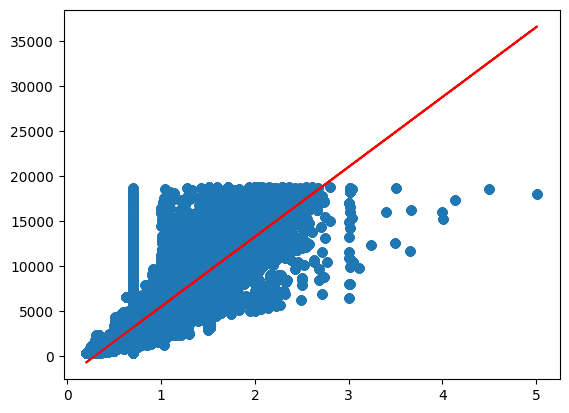

In [133]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

Вычислим ошибку модели

$$MAE = \frac1l\sum_{i=1}^l |a(x_i)-y_i|$$

In [134]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, pred)

In [135]:
np.mean(y)

np.float64(3932.799721913237)

In [136]:
print(f'ошибка модели на  {((mae/np.mean(y))*100):.2f}%')

ошибка модели на  26.07%


## Анализ распределения столбцов (целевой переменной)

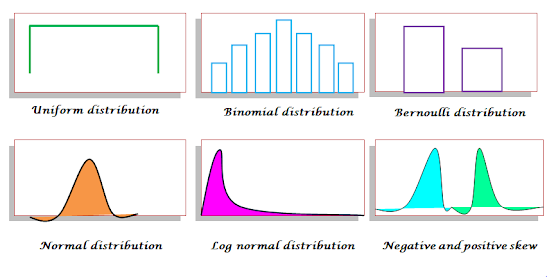

В основном в задачах регрессии мы ожидаем увидеть нормально распределенную целевую переменную. Многие модели заточены под нормальное распределение.

Но не только в этом дело...

<Axes: xlabel='price', ylabel='Count'>

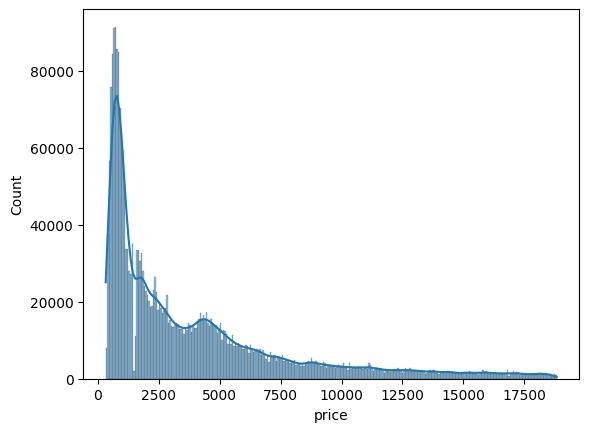

In [137]:
sns.histplot(data = df['price'], kde = True)

<Axes: xlabel='price', ylabel='Count'>

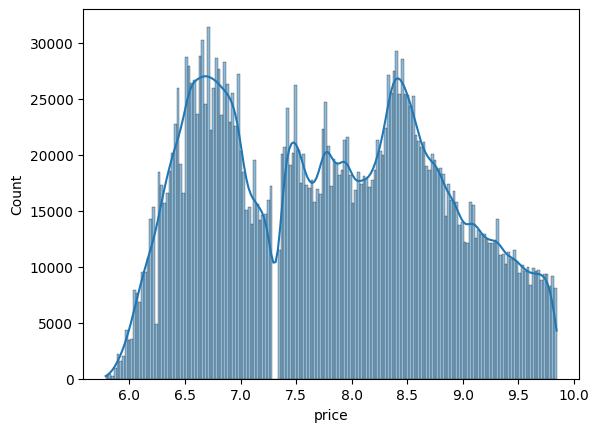

In [138]:
sns.histplot(data = np.log(df['price']), kde = True)

Мы видим у распределения тяжелый хвост, который может быть трудно прогнозируем моделями (так как там мало значений).

Проверим это.

In [139]:
mean_absolute_error(y[y < 10000], pred[y < 10000])

812.3724733565091

In [140]:
mean_absolute_error(y[y >= 10000], pred[y >= 10000])

3012.320716995398

Действительно, ошибка на дорогих алмазах больше.

In [141]:
X2 = df[['carat']]
y2 = df['depth']


In [142]:
lr = LinearRegression()
lr.fit(X2, y2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [143]:
pred_depth = lr.predict(X2)

mean_absolute_error(y2, pred_depth), np.mean(y2)

(1.008323428206494, np.float64(61.75035038932146))

<Axes: xlabel='depth', ylabel='Count'>

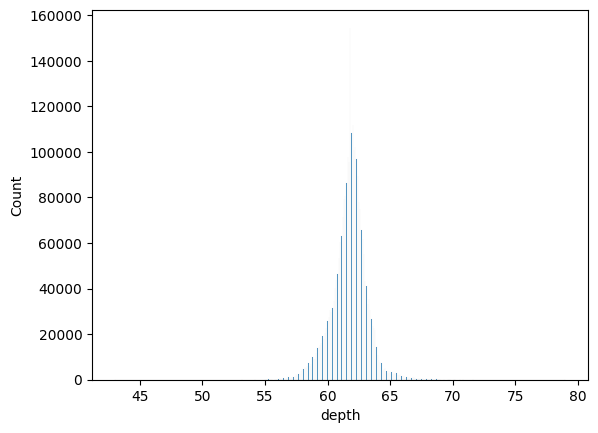

In [144]:
sns.histplot(df.depth)

In [145]:
len(y2[y2<60])/len(y2) # доля выборки

0.092862439747868

In [146]:
mean_absolute_error(y2[y2<60], pred_depth[y2<60])

2.7839229538305514

In [83]:
len(y2[(y2 >= 60) & (y2 <= 63)])/len(y2) # доля выборки

0.7785335935321996

In [84]:
mean_absolute_error(y2[(y2 >= 60) & (y2 <= 63)], pred_depth[(y2 >= 60) & (y2 <= 63)])

0.6017471857996348

## Задание 4

Будем решать задачу прогноза стоимости алмаза по его параметру `table`.

Обучите линейную регрессию для решения этой задачи и выведите на экран ошибку MAE.

In [147]:
X = df[['table']]
y = df['price']

In [148]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

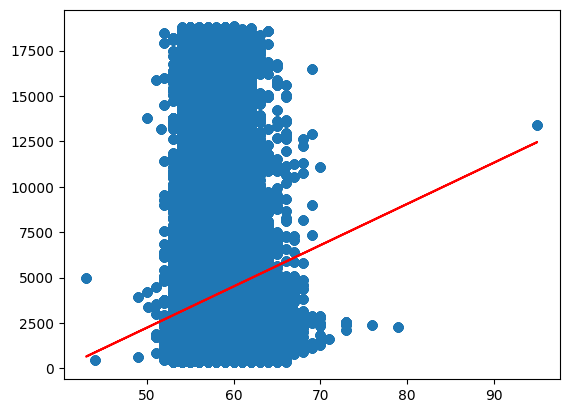

In [149]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

In [151]:
mae = mean_absolute_error(y, pred)

## Задание 5

Сколько процентов от среднего значения `price` составляет ошибка?

In [153]:
print(f'ошибка модели на  {((mae/np.mean(y))*100):.2f}%')

ошибка модели на  76.00%


## Задание 6

Вычислите ошибку MAE для алмазов маленькой и большой стоимости отдельно:

* `price` < 10_000
* `price` >= 10_000

Какая из ошибок больше?

Как вы думаете почему?

In [167]:
print(f'ошибка для price < 10000 составляет = {(mean_absolute_error(df[df['price'] < 10000]['price'], lr.predict(df[df['price'] < 10000][['table']]))/np.mean(df[df['price'] < 10000]['price']) * 100):.2f}%')

ошибка для price < 10000 составляет = 78.82%


In [168]:
print(f'ошибка для price >= 10000 составляет = {(mean_absolute_error(df[df['price'] >= 10000]['price'], lr.predict(df[df['price'] >= 10000][['table']]))/np.mean(df[df['price'] >= 10000]['price']) * 100):.2f}%')

ошибка для price >= 10000 составляет = 70.44%


Обе ошибки очень большие

In [156]:
df[df['price'] >= 10000].describe()

,carat,depth,table,price,'x','y','z'
count,266373.000000,266373.000000,266373.000000,266373.000000,266373.000000,266373.000000,266373.000000
mean,1.727984,61.649761,57.893356,13639.760482,7.671503,7.672859,4.722608
std,0.391190,1.425664,2.213369,2517.807217,0.589323,0.914546,0.396825
min,0.700000,55.200000,50.000000,10000.000000,0.000000,0.000000,0.000000
25%,1.510000,60.800000,56.000000,11403.000000,7.320000,7.320000,4.520000
50%,1.670000,61.800000,58.000000,13234.000000,7.610000,7.600000,4.680000
75%,2.020000,62.500000,59.000000,15729.000000,8.120000,8.110000,5.010000
max,5.010000,70.600000,95.000000,18823.000000,10.740000,58.900000,8.060000


In [157]:
df[df['price'] < 10000].describe()

,carat,depth,table,price,'x','y','z'
count,2.484567e+06,2.484567e+06,2.484567e+06,2.484567e+06,2.484567e+06,2.484567e+06,2.484567e+06
mean,6.968126e-01,6.176113e+01,5.741042e+01,2.892106e+03,5.523131e+00,5.526649e+00,3.411809e+00
std,3.559594e-01,1.417155e+00,2.231667e+00,2.399370e+03,9.534557e-01,9.531275e-01,6.067441e-01
min,2.000000e-01,4.300000e+01,4.300000e+01,3.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.800000e-01,6.110000e+01,5.600000e+01,8.930000e+02,4.640000e+00,4.660000e+00,2.860000e+00
50%,6.100000e-01,6.180000e+01,5.700000e+01,2.026000e+03,5.430000e+00,5.450000e+00,3.350000e+00
75%,1.010000e+00,6.250000e+01,5.900000e+01,4.406000e+03,6.380000e+00,6.370000e+00,3.950000e+00
max,3.110000e+00,7.900000e+01,7.900000e+01,9.999000e+03,9.240000e+00,3.180000e+01,3.180000e+01


In [164]:
print('Разница количества дешевых и дорогих алмазов в выборке составляет =',len(df[df['price'] < 10000]) - len(df[df['price'] > 10000]))

Разница количества дешевых и дорогих алмазов в выборке составляет = 2218245


`Почему ошибки большие?` 

Потому что дорогих алмазов меньше нежели дорогих и разброс в цене у них больше